## How to access Hi-C map from .gcmap file?

`.gcmap` is a HDF5 format file.

***

**At first, we import modules:**

* [gcMapExplorer.lib](../ccmap.html)
* [numpy](http://docs.scipy.org/doc/numpy/reference/routines.html) for statistics
* [matplotlib](http://matplotlib.org/gallery.html) for plotting

In [27]:
import gcMapExplorer.lib as gmlib
import numpy as np
import matplotlib.pyplot as plt

# To show inline plots
%matplotlib inline
plt.style.use('ggplot')              # Theme for plotting

#### Load a `.gcmap` file

In [28]:
filename = '/home/rajendra/workspace/genome_3d_organization/GM12878_CellLine/gcmaps/normKR_10kb.gcmap'
gcmap = gmlib.gcmap.GCMAP(filename, mapName='chr21')

# gcmap.toCoarserResolution()

ccmap = gmlib.gcmap.loadGCMapAsCCMap(filename, mapName='chr21')

**Print some properties of Hi-C data**

In [29]:
for key in gcmap.__dict__:
    print(key, ' : ', gcmap.__dict__[key])

xlabel  :  chr21
ylabel  :  chr21
binsizes  :  [10000, 20000, 40000, 80000, 160000]
maxvalue  :  0.709276914597
matrix  :  <HDF5 dataset "10kb": shape (4812, 4812), type "<f4">
binsize  :  10000
yticks  :  [0, 48120000]
resolution  :  10kb
shape  :  (4812, 4812)
mapType  :  intra
xticks  :  [0, 48120000]
finestResolution  :  10kb
bNoData  :  [ True  True  True ..., False False False]
dtype  :  float32
title  :  chr21_vs_chr21
minvalue  :  1.64669982041e-05
bLog  :  False
hdf5  :  <HDF5 file "normKR_10kb.gcmap" (mode r+)>
fileOpened  :  True
groupName  :  chr21


***

#### Reading contact map

Contact matrix is available as ``gcmap.matrix``.

In [30]:
print(gcmap.matrix[:])

ccmap.make_readable()
print(ccmap.matrix)

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.20023455  0.09320904
   0.03361979]
 [ 0.          0.          0.         ...,  0.09320904  0.28270519
   0.04283975]
 [ 0.          0.          0.         ...,  0.03361979  0.04283975
   0.37423587]]
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.20023455  0.09320904
   0.03361979]
 [ 0.          0.          0.         ...,  0.09320904  0.28270519
   0.04283975]
 [ 0.          0.          0.         ...,  0.03361979  0.04283975
   0.37423587]]


***

#### Whether matrix is balanced?

If matrix is balanced, sum of rows and coloumns will be always one. Sum of rows and columns can be easily calculated using [numpy.sum](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.sum.html) function.

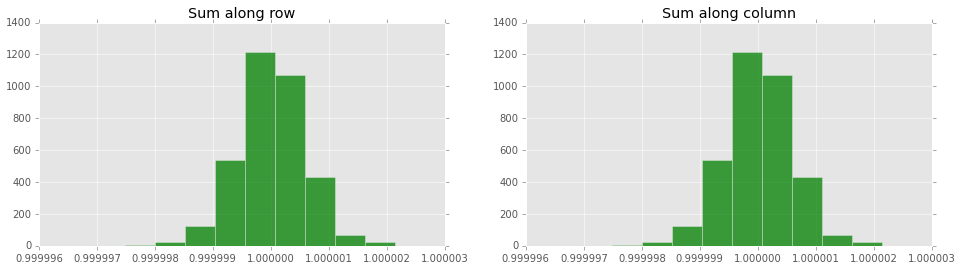

In [43]:
r_sum = np.sum(gcmap.matrix, axis = 0)             # Sum along row using numpy.sum
c_sum = np.sum(gcmap.matrix, axis = 1)             # Sum along column using numpy.sum

idx = np.nonzero(r_sum > 0 )
median = np.median( r_sum[idx] )

# Plot the values for visual representations
fig = plt.figure(figsize=(16,4))                               # Figure size

ax1 = fig.add_subplot(1,2,1)                                   # Axes first plot
ax1.set_title('Sum along row')                                 # Title first plot
ax1.get_xaxis().get_major_formatter().set_useOffset(False)     # Prevent ticks auto-formatting

ax2 = fig.add_subplot(1,2,2)                                   # Axes second plot
ax2.set_title('Sum along column')
ax2.get_xaxis().get_major_formatter().set_useOffset(False)

n, bins, patches = ax1.hist(r_sum[idx], 10, facecolor='green', alpha=0.75)  # Plot in first axes
n, bins, patches = ax2.hist(r_sum[idx], 10, facecolor='green', alpha=0.75)  # Plot in second axes

#ax1.set_ylim(0.9, 1.1)
#ax2.set_ylim(0.9, 1.1)

plt.show()

As can be seen in the above plot, sum of rows/columns are approximately one. It means that the matrix is balanced.

***

#### Using more numpy modules

Lets plot average and median of each rows using [numpy.mean](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.mean.html) and [numpy.median](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.median.html).

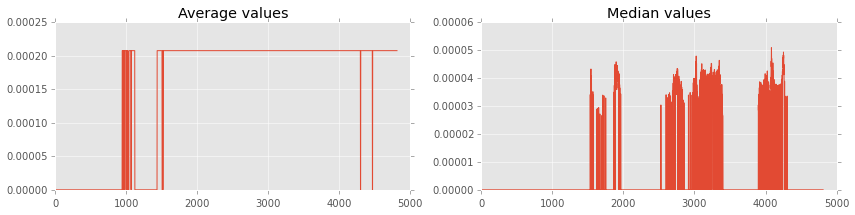

In [6]:
averages = np.mean(gcmap.matrix, axis = 1)            # Calculating mean using numpy.mean
medians = np.median(gcmap.matrix, axis = 0)           # Calculating median using numpy.median

# Plot the values for visual representations
fig = plt.figure(figsize=(14,3))                               # Figure size

ax1 = fig.add_subplot(1,2,1)                                   # Axes first plot
ax1.set_title('Average values')                                 # Title first plot
ax1.get_yaxis().get_major_formatter().set_useOffset(False)     # Prevent ticks auto-formatting

ax2 = fig.add_subplot(1,2,2)                                   # Axes second plot
ax2.set_title('Median values')
ax2.get_yaxis().get_major_formatter().set_useOffset(False)

# in below both plots, x-axis is index from original matrix to preserve original location
ax1.plot(averages)   # Plot in first axes
ax2.plot(medians)    # Plot in second axes

plt.show()




## Time

In [7]:
cmap = np.asarray( ccmap.matrix[:] )

print('cmap Type:', type(cmap))
print('ccmap Type:', type(ccmap.matrix))
print('gcmap Type:', type(gcmap.matrix))

print(' ')

%timeit np.sum(gcmap.matrix, axis = 0)             # Sum along row using numpy.sum
%timeit np.sum(ccmap.matrix, axis = 0)             # Sum along row using numpy.sum
%timeit np.sum(cmap, axis = 0)             # Sum along row using numpy.sum

print(' ')

%timeit np.sum(gcmap.matrix, axis = 1)             # Sum along column using numpy.sum
%timeit np.sum(ccmap.matrix, axis = 1)             # Sum along column using numpy.sum
%timeit np.sum(cmap, axis = 1)             # Sum along column using numpy.sum

print(' ')

%timeit np.mean(gcmap.matrix, axis = 1)            # Calculating mean using numpy.mean
%timeit np.mean(ccmap.matrix, axis = 1)            # Calculating mean using numpy.mean
%timeit np.mean(cmap, axis = 1)            # Calculating mean using numpy.mean

print(' ')

%timeit np.median(gcmap.matrix, axis = 0)           # Calculating median using numpy.median
%timeit np.median(ccmap.matrix, axis = 0)           # Calculating median using numpy.median
%timeit np.median(cmap, axis = 0)           # Calculating median using numpy.median

del ccmap


cmap Type: <class 'numpy.ndarray'>
ccmap Type: <class 'numpy.core.memmap.memmap'>
gcmap Type: <class 'h5py._hl.dataset.Dataset'>
 
10 loops, best of 3: 165 ms per loop
100 loops, best of 3: 5.68 ms per loop
100 loops, best of 3: 5.67 ms per loop
 
10 loops, best of 3: 167 ms per loop
100 loops, best of 3: 7.36 ms per loop
100 loops, best of 3: 7.35 ms per loop
 
10 loops, best of 3: 167 ms per loop
100 loops, best of 3: 7.4 ms per loop
100 loops, best of 3: 7.38 ms per loop
 
1 loop, best of 3: 341 ms per loop
10 loops, best of 3: 183 ms per loop
10 loops, best of 3: 183 ms per loop
